In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_csv("modified_c4_epa_air_quality.csv")

Displaying the first 10 rows to get a sense of how the data is structured:

In [3]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The aqi_log column represents AQI readings that were transformed logarithmically to suit the objectives of this lab.

In [6]:
data.shape

(260, 8)

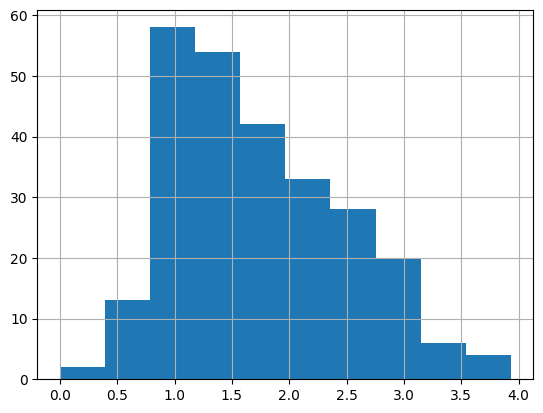

In [7]:
data["aqi_log"].hist();

We noticed that the shape of the distribution on the histogram has a slight right skew, and appears to be a bell shape. This shape is a suggestion that the distribution of this data may be considered normal.

# Statistical tests
- Defining two variables to store the mean and standard deviation, respectively, for aqi_log. Creating these variables will help on easily accessing these measures as we continue with the calculations involved in applying the empirical rule.

In [10]:
#defining variable for aqi_log mean
mean_aqi_log = data["aqi_log"].mean()

#printing the mean
print(mean_aqi_log)

1.7669210929985582


In [13]:
#defining variable for aqi_log standard deviation
std_aqi_log = data["aqi_log"].std()

#printing standard deviation
print(std_aqi_log)

0.7147155520223721


In [24]:
#defining variable for lower limit, 1 std deviation below the mean
lower_limit = mean_aqi_log - 1 * std_aqi_log

#defining variable for upper limit, 1 std deviation above the mean
upper_limit = mean_aqi_log + 1 * std_aqi_log

#displaying upper and lower limits
print("Upper limit:", upper_limit, "\nLower limit:", lower_limit)

Upper limit: 2.4816366450209304 
Lower limit: 1.052205540976186


In [25]:
#displaying percentage of data that falls within 1 std deviation of the mean
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

Now, considering the second part of the empirical rule: whether 95% of the aqi_log data falls within 2 standard deviations of the mean.

To compute the actual percentage of data that satisfies this criteria, we'll define the lower limit and the upper limit. This will confirm whether each value falls within it.

In [27]:
#defining variable for lower limit, 2 std deviation below the mean
lower_limit = mean_aqi_log - 2 * std_aqi_log

#defining variable for upper limit, 2 std deviation below the mean
upper_limit = mean_aqi_log + 2 * std_aqi_log

#printing values
print("Upper limit:", upper_limit, "\nLower limit:", lower_limit)

Upper limit: 3.1963521970433026 
Lower limit: 0.3374899889538139


In [28]:
#displaying the percentual of data that falls witin 2 std deviation of the mean
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

Now, considering the third part of the empirical rule: whether 99.7% of the aqi_log data falls within 3 standard deviations of the mean.

In [31]:
lower_limit = mean_aqi_log - 3 * std_aqi_log
upper_limit = mean_aqi_log + 3 * std_aqi_log

print("Upper limit:", upper_limit, "\nLower limit", lower_limit)

Upper limit: 3.9110677490656744 
Lower limit -0.37722556306855815


In [34]:
#displaying the data that falls within 3 std deviation of the mean
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

# Results and evaluation
- About 76.15% of tha data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

Utilizing the empirical rule, the data doesn't perfectly align with a normal distribution, as evidenced by the proximity of 95.77% to 99.62%, which contrasts the relatively distant 76.15%. Nevertheless, the data can be regarded as roughly following a normal distribution.


In [36]:
#using z-score to find possible outliers
#computing z-score for every aqi_log value, adding a column named z_score in the data to store those results

data["z_score"] = stats.zscore(data["aqi_log"])

#displaying rows to ensure new column was added
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [37]:
#identifying the parts of the data where aqi_log is above or below 3 std deviation of the mean
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


We can observe that the aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means that the **air quality at that site is worse than the rest of the sites represented in the data.**

#  Considerations
** Key Insights from the Lab: **
- **Visual Analysis:** Plotting data through a histogram provides a tangible visual representation, allowing us to assess the normality of data distribution swiftly.

- **Empirical Rule Application:** By employing the empirical rule, we can authenticate the normality of a distribution. It serves as a robust verification tool.

- **Statistical Measures:** The mean and standard deviation are pivotal in the context of the empirical rule. Their values give a foundation to the distribution's characteristics.

- **Identifying Outliers:** Utilizing the Z-score method, potential outliers in the data can be pinpointed, which aids in enhancing data accuracy.

### **Stakeholder Recommendations based on AQI Data Analysis:**

- The data distribution of 'aqi_log' leans towards being normal, implying that our data collection process and the ensuing analysis is statistically sound.

- Our rigorous analysis has brought to light that the West Phoenix site exhibits a notably poorer air quality compared to other monitored sites. This raises immediate concerns.

- Given these findings, it would be prudent to channel more resources and efforts towards a detailed investigation of the West Phoenix site. A focused study can help discern the root causes of the deteriorated air quality and subsequently, devise strategies to ameliorate the situation for the betterment of the community.